In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import pandas as pd

C:\Users\kanko\AppData\Local\Temp\ipykernel_12400\3816994210.py:5: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
data=pd.read_csv('processed.csv')

In [3]:
data.head()

,password,strength,length,capital,small,special,numeric
0,kzde5577,1,8,0,4,0,4
1,kino3434,1,8,0,4,0,4
2,visi7k1yr,1,9,0,7,0,2
3,megzy123,1,8,0,5,0,3
4,lamborghin1,1,11,0,10,0,1


In [4]:
y=data['strength'].values
x=data[['length','capital','small','special','numeric']].values

In [5]:
x.shape

(669639, 5)

In [6]:
xtrain,xtest,ytrain,ytest=tts(x,y,test_size=0.2,random_state=42)
print(xtrain.shape,ytrain.shape)
print(xtest.shape,ytest.shape)

(535711, 5) (535711,)
(133928, 5) (133928,)


In [7]:
sc=StandardScaler()
xtrain=sc.fit_transform(xtrain)
xtest=sc.transform(xtest)

In [8]:
model=MLPClassifier(hidden_layer_sizes=(16,16),max_iter=300)
model.fit(xtrain,ytrain)

MLPClassifier(hidden_layer_sizes=(16, 16), max_iter=300)

In [9]:
ypred=model.predict(xtest)

In [10]:
print("The accuracy of the model is: ",accuracy_score(ytest,ypred)*100," % !!!")

The accuracy of the model is:  99.99775999044263  % !!!


In [11]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17908
           1       1.00      1.00      1.00     99519
           2       1.00      1.00      1.00     16501

    accuracy                           1.00    133928
   macro avg       1.00      1.00      1.00    133928
weighted avg       1.00      1.00      1.00    133928



In [12]:
print("The confusion matrix is: ")
cf=confusion_matrix(ytest,ypred)
print(cf)

The confusion matrix is: 
[[17908     0     0]
 [    0 99517     2]
 [    0     1 16500]]


In [13]:
import joblib
joblib.dump(sc,'scaler.pkl')
joblib.dump(model,'model.pkl')

['model.pkl']

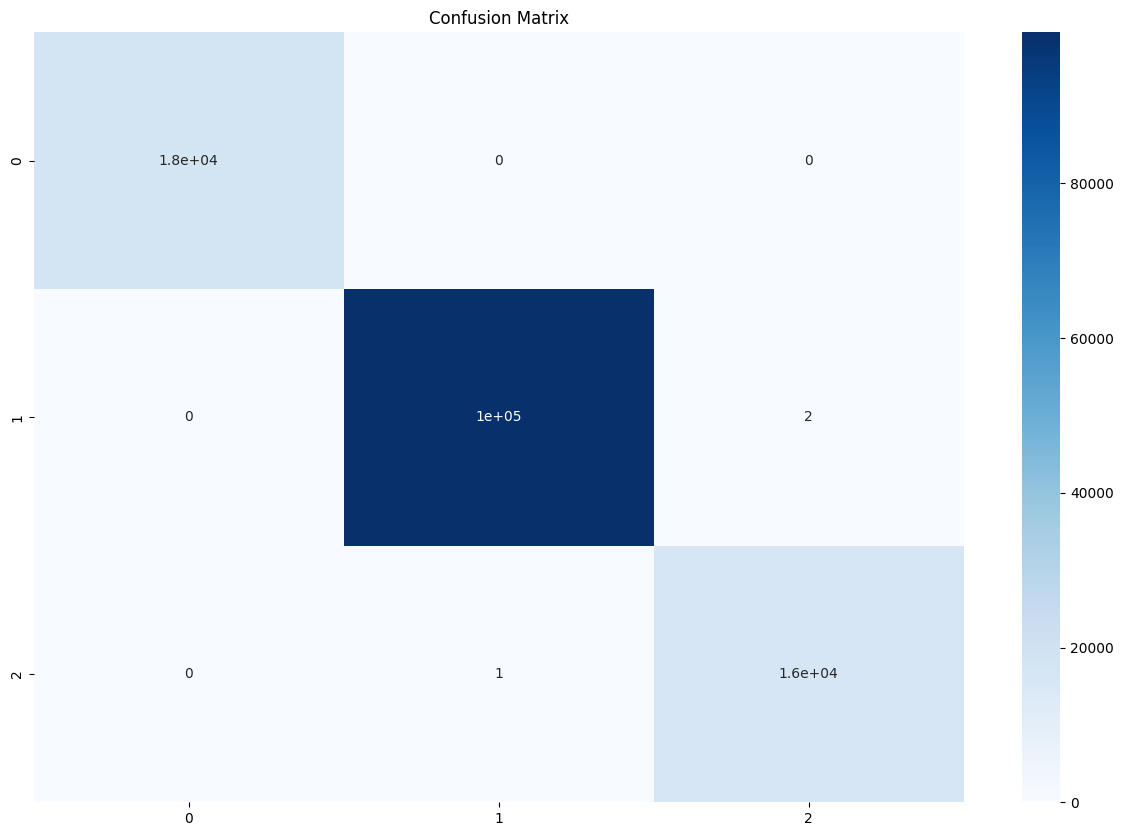

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
sns.heatmap(cf,annot=True,cmap='Blues')
plt.title('Confusion Matrix')
plt.savefig('confusion.jpg')
plt.show()